<h2 style="font-weight: 700; text-align: center">Image Enhancement - 3 (Neighbourhood Processing)</h2>

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from copy import deepcopy

#### Importing subject image as a grayscale image

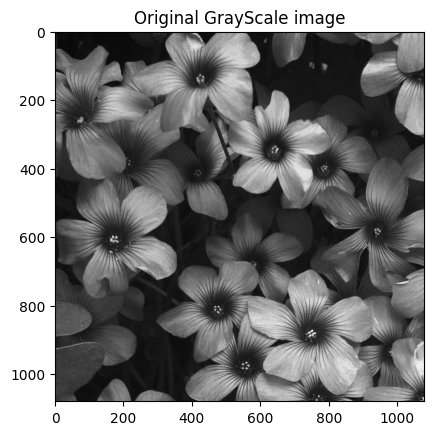

In [2]:
img = cv.imread("../Sample Images/Oxalis.jpg")
imgg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgg = imgg[:1080, :1080]
plt.title("Original GrayScale image")
plt.imshow(imgg, cmap="gray")
plt.show()

#### Utility Function - Matplotting the output(s)

In [3]:
def matplot_images(*imgs, titles):
  fig = plt.figure(figsize=(12, 7))
  columns = len(imgs)
  for i in range(columns):
    fig.add_subplot(1, columns, i + 1)
    plt.imshow(imgs[i], cmap="gray")
    plt.title(titles[i])
  plt.show()

#### Adding Gaussian noise on the image

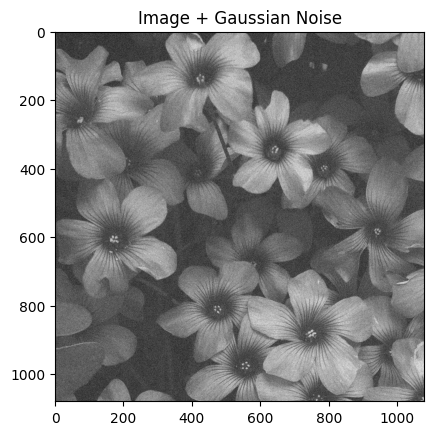

In [4]:
gaussian = np.random.normal(10, 20, (imgg.shape[0], imgg.shape[1]))
noisy_imgg = np.array(imgg) + gaussian
plt.title("Image + Gaussian Noise")
plt.imshow(noisy_imgg, cmap="gray")
plt.show()

#### Image-Mask Convolution function

In [5]:
def convolute_image(img, mask):
  mask = np.array(mask)
  conv_img = [[0 for _ in range(img.shape[1])] for _ in range(img.shape[0])]
  for x in range(1, img.shape[0] - 1):
    for y in range(1, img.shape[1] - 1):
      convoluted = img[x - 1: x + 2, y - 1: y + 2] * mask
      val = sum(map(sum, convoluted))
      if val > 0:
        conv_img[x][y] = val if val <= 255 else 255
      else:
        conv_img[x][y] = 0
  return np.array(conv_img)

#### Applying Low Pass Filter

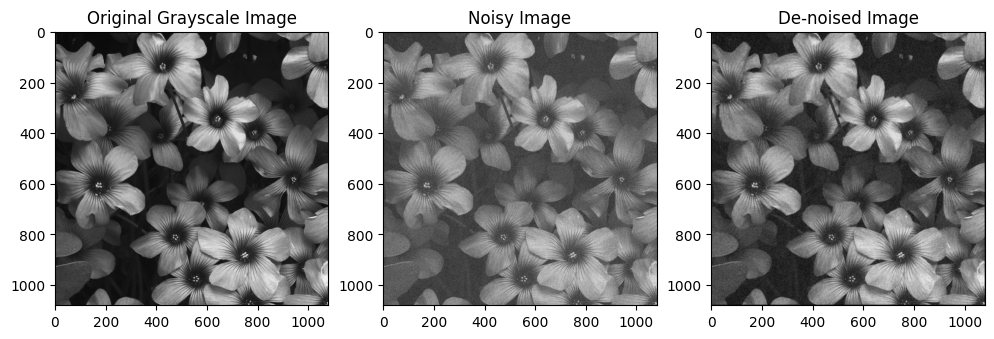

In [6]:
mask = [[1/9 for _ in range(3)] for _ in range(3)]        # a 3 x 3 average filter
denoised = convolute_image(noisy_imgg, mask)
matplot_images(imgg, noisy_imgg, denoised, titles=["Original Grayscale Image", "Noisy Image", "De-noised Image"])

#### Adding Salt-Pepper noise to the original image

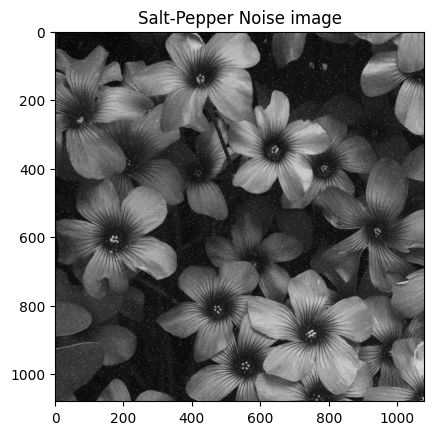

In [7]:
random_indices = []
sp_noise_img = deepcopy(imgg)
for i in range(10000):
  random_indices.append((np.random.randint(0, len(imgg)), np.random.randint(0, len(imgg[0]))))
for indices in random_indices:
  sp_noise_img[indices[0]][indices[1]] = 255

plt.title("Salt-Pepper Noise image")
plt.imshow(sp_noise_img, cmap="gray")
plt.show()

In [8]:
def median_filtering(img):
  filtered_img = [[0 for _ in range(img.shape[1])] for _ in range(img.shape[0])]
  for x in range(1, img.shape[0] - 1):
    for y in range(1, img.shape[1] - 1):
      filtered_img[x][y] = sorted([r for row in img[x - 1: x + 2, y - 1: y + 2] for r in row])[4]            # choosing the center value after sorting the flattened slice
  
  return filtered_img

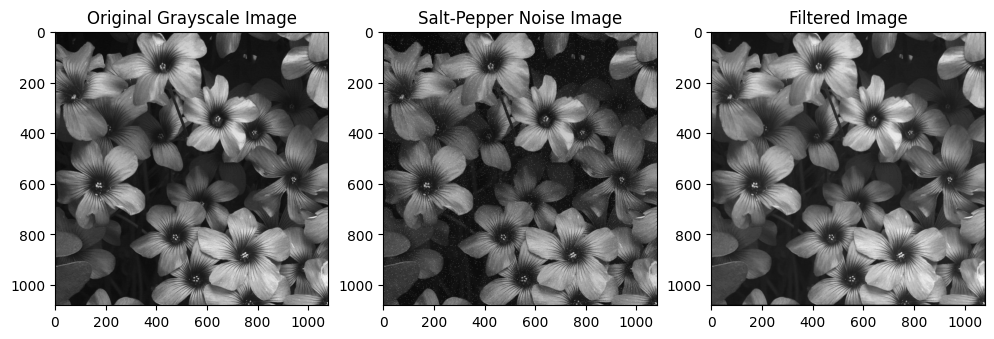

In [9]:
filtered_img = median_filtering(sp_noise_img)
matplot_images(imgg, sp_noise_img, filtered_img, titles=["Original Grayscale Image", "Salt-Pepper Noise Image", "Filtered Image"])

#### Conclusion

- Average Filtering is effective in removing High Frequency values such as Gaussian noise as it uses a Low Pass filter. It spreads the noise even more, reducing its effect overall.
- Median Filtering successfully removes noise such as Salt and Pepper noise as it doesn't work on the principle of have a mask but rather forming one on the noisy image. Then the median value of the formed mask replaces at the center of the mask.